## Comapritive analysis of EM and K means clustering

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)

[[1.00e+00 5.10e+00 3.50e+00 1.40e+00 2.00e-01]
 [2.00e+00 4.90e+00 3.00e+00 1.40e+00 2.00e-01]
 [3.00e+00 4.70e+00 3.20e+00 1.30e+00 2.00e-01]
 [4.00e+00 4.60e+00 3.10e+00 1.50e+00 2.00e-01]
 [5.00e+00 5.00e+00 3.60e+00 1.40e+00 2.00e-01]
 [6.00e+00 5.40e+00 3.90e+00 1.70e+00 4.00e-01]
 [7.00e+00 4.60e+00 3.40e+00 1.40e+00 3.00e-01]
 [8.00e+00 5.00e+00 3.40e+00 1.50e+00 2.00e-01]
 [9.00e+00 4.40e+00 2.90e+00 1.40e+00 2.00e-01]
 [1.00e+01 4.90e+00 3.10e+00 1.50e+00 1.00e-01]
 [1.10e+01 5.40e+00 3.70e+00 1.50e+00 2.00e-01]
 [1.20e+01 4.80e+00 3.40e+00 1.60e+00 2.00e-01]
 [1.30e+01 4.80e+00 3.00e+00 1.40e+00 1.00e-01]
 [1.40e+01 4.30e+00 3.00e+00 1.10e+00 1.00e-01]
 [1.50e+01 5.80e+00 4.00e+00 1.20e+00 2.00e-01]
 [1.60e+01 5.70e+00 4.40e+00 1.50e+00 4.00e-01]
 [1.70e+01 5.40e+00 3.90e+00 1.30e+00 4.00e-01]
 [1.80e+01 5.10e+00 3.50e+00 1.40e+00 3.00e-01]
 [1.90e+01 5.70e+00 3.80e+00 1.70e+00 3.00e-01]
 [2.00e+01 5.10e+00 3.80e+00 1.50e+00 3.00e-01]
 [2.10e+01 5.40e+00 3.40e+00 1.70e+00 2.

In [5]:
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

## K-means

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def Kmeans(X, k, max_iters = 100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)


        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return labels, centroids

In [21]:
k = 3
labels_kmeans, centroids = Kmeans(X, k)

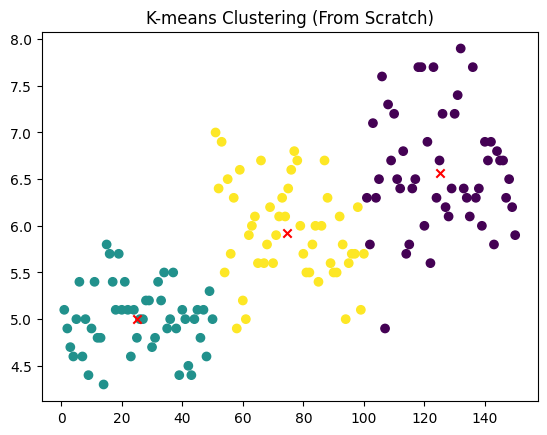

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')  
plt.title("K-means Clustering (From Scratch)")
plt.show()

## EM algorithm

In [11]:
from scipy.stats import multivariate_normal

In [17]:
import numpy as np
from scipy.stats import multivariate_normal

def em_gmm(X, k, max_iters=100, reg_cov=1e-6):
    n, d = X.shape
    
    
    means = X[np.random.choice(n, k, replace=False)]
    covariances = [np.eye(d) for _ in range(k)]
    mixing_coeffs = np.ones(k) / k
    
    for _ in range(max_iters):
        
        responsibilities = np.zeros((n, k))
        for i in range(k):
            
            cov = covariances[i] + reg_cov * np.eye(d)
            responsibilities[:, i] = mixing_coeffs[i] * multivariate_normal.pdf(X, mean=means[i], cov=cov)
        
        
        responsibilities_sum = responsibilities.sum(axis=1, keepdims=True)
        responsibilities_sum[responsibilities_sum == 0] = 1e-6  
        responsibilities /= responsibilities_sum
        
        
        Nk = responsibilities.sum(axis=0)
        means = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]
        for i in range(k):
            diff = X - means[i]
            covariances[i] = np.dot(responsibilities[:, i] * diff.T, diff) / Nk[i]
            
            covariances[i] += reg_cov * np.eye(d)
        mixing_coeffs = Nk / n
    
   
    labels = np.argmax(responsibilities, axis=1)
    return labels, means, covariances

In [23]:
k = 3
labels_gmm, means, covariances = em_gmm(X, k)

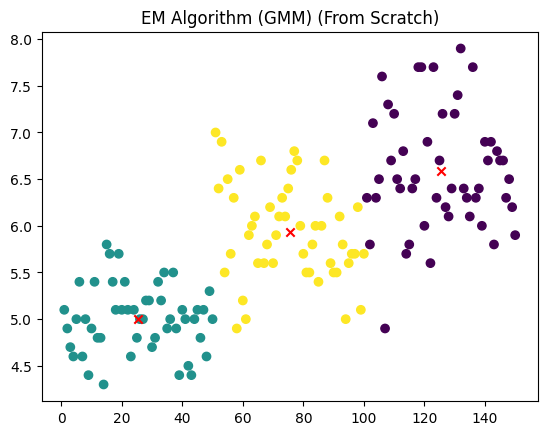

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x')  
plt.title("EM Algorithm (GMM) (From Scratch)")
plt.show()


In [26]:
from sklearn.metrics import silhouette_score, adjusted_rand_score


kmeans_silhouette = silhouette_score(X, labels_kmeans)
kmeans_ari = adjusted_rand_score(y, labels_kmeans)


gmm_silhouette = silhouette_score(X, labels_gmm)
gmm_ari = adjusted_rand_score(y, labels_gmm)

print("K-means Silhouette Score:", kmeans_silhouette)
print("K-means Adjusted Rand Index:", kmeans_ari)
print("GMM Silhouette Score:", gmm_silhouette)
print("GMM Adjusted Rand Index:", gmm_ari)

K-means Silhouette Score: 0.5816702617893469
K-means Adjusted Rand Index: 0.96006671645913
GMM Silhouette Score: 0.5821934246576435
GMM Adjusted Rand Index: 1.0


In [27]:
random_index = np.random.choice(X.shape[0])
random_row = X[random_index]
true_label = y[random_index]

distances_kmeans = np.sqrt(((random_row - centroids)**2).sum(axis=1))
predicted_label_kmeans = np.argmin(distances_kmeans)

responsibilities_gmm = np.zeros(k)
for i in range(k):
    cov = covariances[i] + 1e-6 * np.eye(X.shape[1])
    responsibilities_gmm[i] = mixing_coeffs[i] * multivariate_normal.pdf(random_row, mean=means[i], cov=cov)
predicted_label_gmm = np.argmax(responsibilities_gmm)

print(f"Random Row Index: {random_index}")
print(f"Random Row Data: {random_row}")
print(f"True Label: {true_label}")
print(f"Predicted Label (K-means): {predicted_label_kmeans}")
print(f"Predicted Label (GMM): {predicted_label_gmm}")

if true_label == predicted_label_kmeans:
    print("K-means Prediction: Correct")
else:
    print("K-means Prediction: Incorrect")

if true_label == predicted_label_gmm:
    print("GMM Prediction: Correct")
else:
    print("GMM Prediction: Incorrect")

NameError: name 'mixing_coeffs' is not defined

Random Data Point (Row 46): [1.29794691 1.67233785]
K-means Cluster Assignment: 1
GMM Cluster Assignment: 1
Both algorithms assigned the same cluster!


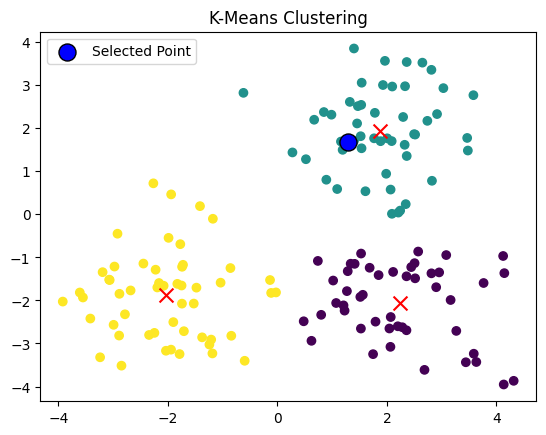

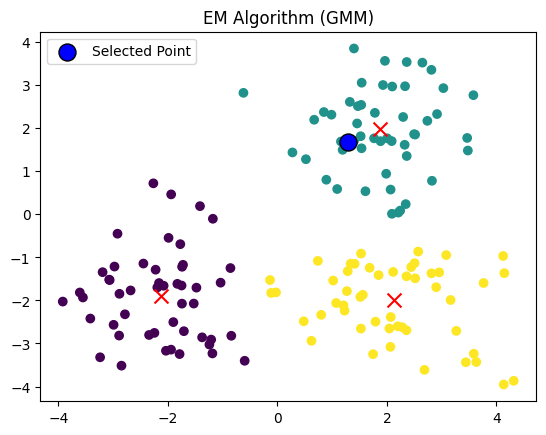

In [31]:
np.random.seed(42)
X = np.vstack([
    np.random.randn(50, 2) + np.array([2, 2]),
    np.random.randn(50, 2) + np.array([-2, -2]),
    np.random.randn(50, 2) + np.array([2, -2])
])
k = 3


kmeans_labels, kmeans_centroids = Kmeans(X, k)
gmm_labels, gmm_means, gmm_covariances = em_gmm(X, k)


random_idx = np.random.randint(X.shape[0])
random_point = X[random_idx]
kmeans_cluster = kmeans_labels[random_idx]
gmm_cluster = gmm_labels[random_idx]

print(f"Random Data Point (Row {random_idx}): {random_point}")
print(f"K-means Cluster Assignment: {kmeans_cluster}")
print(f"GMM Cluster Assignment: {gmm_cluster}")

if kmeans_cluster == gmm_cluster:
    print("Both algorithms assigned the same cluster!")
else:
    print("Different cluster assignments from K-means and GMM.")


plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='x', s=100)
plt.scatter(random_point[0], random_point[1], c='blue', marker='o', edgecolors='black', s=150, label='Selected Point')
plt.title("K-Means Clustering")
plt.legend()
plt.show()


plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis')
plt.scatter(gmm_means[:, 0], gmm_means[:, 1], c='red', marker='x', s=100)
plt.scatter(random_point[0], random_point[1], c='blue', marker='o', edgecolors='black', s=150, label='Selected Point')
plt.title("EM Algorithm (GMM)")
plt.legend()
plt.show()
